In [2]:
# module을 설치해 보아요!
# pip를 이용해서 설치하면 되요!
# pip명령은 command 명령어예요!
# 그런데 우리는 지금 jupyter notebook환경이예요.. 그래서
# pip명령을 직접 사용할 수 없죠.
# colab에서 ternimal 명령어를 이용하려면
# !를 이용하면 되요!
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.1 MB/s eta 0:00:00


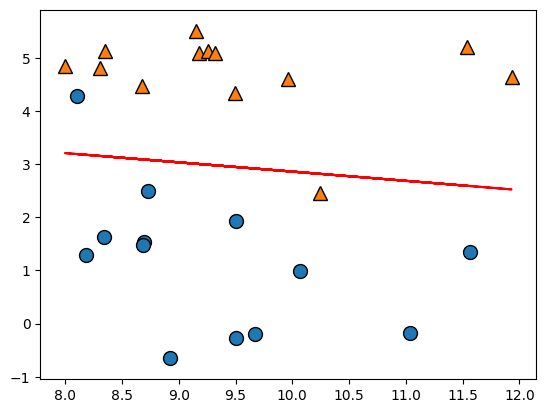

In [17]:
# Logistic Regression의 의미에 대해서 간단하게
# 예를 들어서 알아보아요!

import numpy as np
from sklearn import linear_model
import mglearn  # 데이터셋을 가져오기 위한 용도의 utility module
import matplotlib.pyplot as plt

# Training Data Set을 로딩해 보아요!
(x,y) = mglearn.datasets.make_forge()

# print(type(x))  # <class 'numpy.ndarray'>
# print(x.shape)  # (26, 2)
# print(x)  # x는 2차원 ndarray
# [[ 9.96346605  4.59676542]
#  [11.0329545  -0.16816717]
#  [11.54155807  5.21116083]
# 이 x 데이터를 2차원 평면상에 좌표값으로 사용할꺼예요!
# 즉, 첫번째 컬럼을 x축으로 두번째 컬럼을 y축으로해서 점을찍을꺼예요!

# print(type(y))  # <class 'numpy.ndarray'>
# print(y.shape)  # (26,)
# print(y)
# 이 y데이터를 이용해서 아까 x 데이터에 대한 점을 찍을때 0과 1을 구분해서
# 찍어볼꺼예요!
mglearn.discrete_scatter(x[:,0], x[:,1], y)

# 이 상태에서 Linear Regression Model을 만들어보아요!
model = linear_model.LinearRegression()

model.fit(x[:,0].reshape(-1,1),
          x[:,1].reshape(-1,1))

# 우리의 model은 독립변수가 1개인 linear model이기 때문에
# 모델의 형태는 1차 직선이 되요!
# 1차 직선의 기울기는 당연히 우리가 구한 weight가 되구요!
# 1차 직선의 절편은 우리가 구한 bias가 되요!

plt.plot(x[:,0], x[:,0] * model.coef_.ravel() + model.intercept_, color='r')

plt.show()

[[0.41831972]]


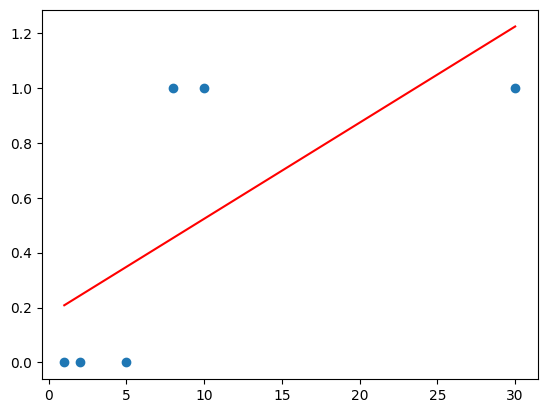

In [22]:
# Linear Regression으로 구현해 보아요!

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Training Data Set
x_data = np.array([1, 2, 5 ,8 ,10, 30]) # 공부시간
t_data = np.array([0, 0, 0, 1, 1, 1]) # 합격여부(0: Fail, 1:Pass)

model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

# prediction => 7시간 공부하면 합격인가요 불합격인가요?
print(model.predict([[7]]))  # [[0.63265306]]  => 63%확률로 아마도 합격일꺼예요!
                             #  [[0.41831972]] => 아마도 불합격

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_, color='r')

plt.show()


In [ ]:
# Logistic Regression Tensorflow Keras와 sklearn으로 구현해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn import linear_model

# Training Data Set
x_data = np.arange(2,21,2).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# sklearn부터 구현해 보아요!
sklearn_model = linear_model.LogisticRegression()

# sklearn을 이용해서 LogisticRegression을 구현할 때 입력으로 들어가는
# 종속변수(target)은 1차원으로 처리해야 해요!
sklearn_model.fit(x_data, t_data.ravel())

# 13시간 공부하면 합격인가요 불합격인가요?
print(sklearn_model.predict([[13]]))  # => 0 불합격으로 판별해요!
print(sklearn_model.predict_proba([[13]]))  # [[0.50009391 0.49990609]]

# Tensorflow Keras 구현

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-3),
                    loss='binary_crossentropy')

keras_model.fit(x_data,
                t_data,
                epochs=500,
                verbose=1)

print(keras_model.predict([[13]]))  # [[0.6082352]]


In [61]:
# 주어진 데이터를 이용해서
# Logistic Regression을 구현해 보아요!
# Tensorflow Keras와 scikit-learn으로 둘 다 구현해 보아요!
# 구현이 다 된 다음 다음의 데이터로 prediction해보아요!
# GRE, GPA, Rank => 600, 3.8, 1
# 합격인가요? 불합격인가요? 확률값으로 출력하세요!

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt

# Raw Data Loading
original = pd.read_csv('/content/drive/MyDrive/[빅데이터 과정 공유폴더]/data/admission/admission.csv')
# display(original.head(), original.shape) # (400, 4)

# 데이터전처리
# 1. 결치값확인
# original.info()  # 결치값은 존재하지 않아요!

# 2. 이상치처리(모든 컬럼에 대해서 이상치에 해당하는 row를 삭제)
zscore_threshold = 2.0
for col in original.columns:
    outlier = original[col][np.abs(stats.zscore(original[col])) > zscore_threshold]
    original = original.loc[~original[col].isin(outlier)]

# print(original.shape)  # (382, 4)  18개의 데이터가 이상치예요!

# 3. 정규화처리
x_data = original.drop('admit', axis=1, inplace=False).values
t_data = original['admit'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(x_data)

x_data_norm = scaler.transform(x_data)


In [54]:
# scikit-learn 구현
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data, t_data.ravel())
sklearn_result = sklearn_model.predict_proba([[600, 3.8, 1]])
print(sklearn_result)  # [[0.43740782 0.56259218]] 즉 56% 확률로 합격!

[[0.43740782 0.56259218]]


In [66]:
# Tensorflow Keras 구현
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))
keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                    loss='binary_crossentropy')
keras_model.fit(x_data_norm,
                t_data,
                epochs=1000,
                verbose=1)

# 학습이 끝난후에 당연히 모델 evaluation(평가)를 진행해야 해요
# 평가 결과가 어느정도 이상이면 아래의 Prediction 수행
# 정확도 최소 98%이상.

predict_data = np.array([[600, 3.8, 1]])
predict_data_norm = scaler.transform(predict_data)
print(keras_model.predict(predict_data_norm))
# [[0.5051387]]
# [[0.41969156]]

# 1. 우리가 항상 scikit-learn 구현과 비교해서 우리 모델이 잘 만든
#    모델인지를 판단해야 하나요?
#    => logistic regression부터는 성능평가지표를 이용해서 모델의 성능평가를
#       진행해야 해요!
# 2. 학습이 잘 이루어지지 않는거 같아요!
#    loss도 값이 충분히 작아지지 않아요!
#    왜 안될까??? => 데이터의 양이 너무 작아요!

Epoch 1/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7624
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7623
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7621
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7620
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7618
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7617
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7616
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7614
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7613
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7612
Epoch 11/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7610
Epoch 12/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7609
Epoch 13/1000
12/12 [====